# Importação das Bibliotecas que serão utilizadas no Modelo

### Aqui segue o pré-processamento e o que foi feito nas Sprints 1 e 2

In [1]:
!pip install --upgrade tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import gdown
import plotly.express as px
import plotly.graph_objects as go
from tensorflow.keras import backend as K
from sklearn.cluster import KMeans

## Download dos arquivos contendo os datasets de consumo desde 2019 a 2024
  - Aqui retiramos a base de 2020, por conta da pandemia do Coronavírus. Foi uma escolha do grupo devido à possibilidade de discrepância nas leituras

In [3]:
arquivo_destino_base = "dataset_{}.csv"

ids = {
    "consumo_2024": "1-iXT7eaJWQokHf9cyfrB8N5wvkdhgjJW",
    "consumo_2023": "1-WfvkRwaRr85B_Joxcm9xVdpyg5NBAmp",
    "consumo_2022": "1-Uu4Tf4lufJVFeJnYKc5w7OeW66pe1eC",
    "consumo_2021": "1-2PsTLzG4dcY4wM0p7vFfabUuLv950gC",
    "consumo_2020": "1-1pOoa0eJlNJ94BMi7p4PTx5KUS96mhX",
    "consumo_2019": "1-2PsTLzG4dcY4wM0p7vFfabUuLv950gC",
    "CONSUMO_GERAL": "1-IOqfwmh_tTIDHeOer8J-HkGFtwuX67g",
}


dataframes = {}


for key, file_id in ids.items():
    url = f"https://drive.google.com/uc?id={file_id}"
    arquivo_destino = arquivo_destino_base.format(key)

    gdown.download(url, arquivo_destino, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-iXT7eaJWQokHf9cyfrB8N5wvkdhgjJW
From (redirected): https://drive.google.com/uc?id=1-iXT7eaJWQokHf9cyfrB8N5wvkdhgjJW&confirm=t&uuid=9deb25e1-e903-4fa6-81a2-83423ad10bc9
To: /content/dataset_consumo_2024.csv
100%|██████████| 668M/668M [00:09<00:00, 72.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-WfvkRwaRr85B_Joxcm9xVdpyg5NBAmp
From (redirected): https://drive.google.com/uc?id=1-WfvkRwaRr85B_Joxcm9xVdpyg5NBAmp&confirm=t&uuid=8f8f3c54-ef91-4ee7-a88b-a77c011002d7
To: /content/dataset_consumo_2023.csv
100%|██████████| 1.09G/1.09G [00:14<00:00, 73.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-Uu4Tf4lufJVFeJnYKc5w7OeW66pe1eC
From (redirected): https://drive.google.com/uc?id=1-Uu4Tf4lufJVFeJnYKc5w7OeW66pe1eC&confirm=t&uuid=7078ec8f-5ff9-4b8c-a0d5-f3e6792a5709
To: /content/dataset_consumo_2022.csv
100%|██████████| 1.07G/1.07G [00:08<00:00, 121MB/s]
Downloading...
From (original):

In [4]:
arquivos_csv = [
    "./dataset_consumo_2024.csv",
    "./dataset_consumo_2023.csv",
    "./dataset_consumo_2022.csv",
    "./dataset_consumo_2021.csv",
    "./dataset_consumo_2019.csv",
]

ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis=0)

<ipython-input-4-3dfbd926fda9>:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis=0)
<ipython-input-4-3dfbd926fda9>:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis=0)
<ipython-input-4-3dfbd926fda9>:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis=0)
<ipython-input-4-3dfbd926fda9>:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis=0)


In [5]:
consumo_geral = pd.read_csv('/content/dataset_CONSUMO_GERAL.csv')

## Download do dataset com o Target das Fraudes

In [6]:
file_id_fraudes = "1-MbIlChqQapcxFkoJgpbQIsN9FBLfbX1"
url_fraudes = f"https://drive.google.com/uc?id={file_id_fraudes}"

gdown.download(url_fraudes, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-MbIlChqQapcxFkoJgpbQIsN9FBLfbX1
To: /content/fraudes.csv
100%|██████████| 55.0M/55.0M [00:01<00:00, 54.8MB/s]


'fraudes.csv'

In [7]:
fraudes = pd.read_csv('/content/fraudes.csv')

### A tabela "ALL_COLUMNS_CONSUMO_GERAL" possui todas as tabelas de consumo e a partir disso decidimos considerar algumas colunas categóricas que podem ajudar a melhorar o desempenho do nosso modelo

In [8]:
ALL_COLUMNS_CONSUMO_GERAL

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2024-05-01,4.0,17.0,16.0,11.0,17188010.0,581756.0,0.0,...,63-RETIDA - FATURA ELETRONICA,-21.0,0.0,NaN,901.0,N,Normal,S,-20.460904,-54.634308
1,1,2.0,2024-06-01,4.0,87.0,60.0,38.0,17424465.0,188809.0,1.0,...,00-NAO ENTREGUE,0.0,0.0,NaN,900.0,N,Normal,S,-20.520205,-54.602621
2,2,2.0,2024-07-01,14.0,85.0,314.0,9.0,17857770.0,454315.0,1.0,...,00-NAO ENTREGUE,0.0,0.0,NaN,900.0,N,Normal,S,-20.517992,-54.605950
3,3,2.0,2024-03-01,8.0,5.0,112.0,25.0,17702922.0,311133.0,0.0,...,04-FIXADA AO PORTAO,0.0,0.0,NaN,900.0,N,Normal,S,-20.453648,-54.611187
4,4,2.0,2024-01-01,12.0,88.0,284.0,43.0,17719490.0,735648.0,1.0,...,02-CAIXA CORREIO,-9.0,0.0,NaN,901.0,N,Normal,S,-20.516981,-54.592872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210815,4210815,2.0,2019-11-01,12.0,8.0,271.0,4.0,17108333.0,1049413.0,1.0,...,02-CAIXA CORREIO,10.0,10.0,MEDIA,107.0,N,Normal,N,-20.469254,-54.597804
4210816,4210816,2.0,2019-11-01,9.0,92.0,330.0,47.0,17171758.0,886058.0,1.0,...,04-FIXADA AO PORTAO,10.0,10.0,MEDIA,107.0,N,Normal,N,-20.550235,-54.573375
4210817,4210817,2.0,2019-11-01,11.0,38.0,416.0,20.0,17779236.0,262062.0,1.0,...,02-CAIXA CORREIO,10.0,10.0,MEDIA,104.0,N,Normal,N,-20.438123,-54.666558
4210818,4210818,2.0,2019-04-01,16.0,3.0,76.0,1.0,17338320.0,167787.0,0.0,...,10-ISENTA - NAO IMPRESSA,0.0,0.0,NaN,900.0,N,Normal,S,-20.456004,-54.596311


### Remoção de colunas indesejadas até o momento

In [9]:
ALL_COLUMNS_CONSUMO_GERAL = ALL_COLUMNS_CONSUMO_GERAL.drop(columns=['Unnamed: 0', 'EMP_CODIGO', 'COD_GRUPO', 'COD_SETOR_COMERCIAL', 'NUM_QUADRA', 'COD_ROTA_LEITURA', 'SEQ_RESPONSAVEL', 'ECO_RESIDENCIAL', 'ECO_COMERCIAL', 'ECO_INDUSTRIAL', 'ECO_PUBLICA', 'ECO_OUTRAS','LTR_ATUAL', 'LTR_COLETADA', 'DAT_LEITURA', 'DIAS_LEITURA', 'COD_LEITURA_INF_1', 'COD_LEITURA_INF_2', 'COD_LEITURA_INF_3', 'HORA_LEITURA', 'DSC_SIMULTANEA', 'COD_LEITURA_INT','EXCECAO'])

In [10]:
ALL_COLUMNS_CONSUMO_GERAL.columns

Index(['REFERENCIA', 'MATRICULA', 'CONS_MEDIDO', 'TIPO_LIGACAO', 'CATEGORIA',
       'SUB_CATEGORIA', 'DSC_OCORRENCIA', 'VOLUME_ESTIMADO',
       'VOLUME_ESTIMADO_ACUM', 'FATURADO_MEDIA', 'STA_TROCA',
       'STA_ACEITA_LEITURA', 'COD_LATITUDE', 'COD_LONGITUDE'],
      dtype='object')

### Nessa seção queriamos validar a tabela de "VOLUME_ESTIMADO_ACUM" para ver se ela poderia agregar dentro do nosso modelo

In [11]:
ALL_COLUMNS_CONSUMO_GERAL[['VOLUME_ESTIMADO_ACUM']].nunique()

,0
VOLUME_ESTIMADO_ACUM,852


In [12]:
ALL_COLUMNS_CONSUMO_GERAL[ALL_COLUMNS_CONSUMO_GERAL['VOLUME_ESTIMADO'] != 0]

,REFERENCIA,MATRICULA,CONS_MEDIDO,TIPO_LIGACAO,CATEGORIA,SUB_CATEGORIA,DSC_OCORRENCIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,STA_TROCA,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,2024-05-01,17188010.0,43.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,-21.0,0.0,NaN,N,S,-20.460904,-54.634308
4,2024-01-01,17719490.0,20.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,-9.0,0.0,NaN,N,S,-20.516981,-54.592872
6,2024-05-01,17839667.0,11.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,-6.0,0.0,NaN,N,S,-20.457056,-54.605360
10,2024-01-01,17369705.0,21.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,-8.0,0.0,NaN,N,S,-20.485598,-54.595796
12,2024-05-01,17270425.0,47.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,-23.0,0.0,NaN,N,S,-20.435660,-54.589481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210813,2019-11-01,17274918.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR COM MOSTRADOR SUJO,10.0,10.0,MEDIA,N,N,-20.517018,-54.600064
4210814,2019-11-01,17256088.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR DE DIFÍCIL ACESSO,10.0,10.0,MEDIA,N,N,-20.416534,-54.568428
4210815,2019-11-01,17108333.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR DE DIFÍCIL ACESSO,10.0,10.0,MEDIA,N,N,-20.469254,-54.597804
4210816,2019-11-01,17171758.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR DE DIFÍCIL ACESSO,10.0,10.0,MEDIA,N,N,-20.550235,-54.573375


#### O insight retirado aqui é que talvez a melhor coluna para validação e ser utilizada como featura no modelo é a coluna de Volume Estimado. Ela possui maior consistência nos resultados, do que a coluna de Volume Estimado Acumulado

### Separação de Features relevantes

Após pesquisas e visualizar as colunas disponíveis, percebemos uma coluna que poderia ser interessante para o processo de identificação de fraude. A coluna de "DSC_OCORRENCIA". Ela basicamente corresponde a descrição de como foi o processo de vistoria e coleta do responsável e em cada um dos domicílios (matrícula)

Isso surgiu como uma possibilidade de tentar direcionar o modelo para casos nos quais há uma maior possibilidade de uma fraude, de acordo com a visualização do medidor em cada um desses domicílios.

In [13]:
ALL_COLUMNS_CONSUMO_GERAL_PREMISSA_VINI = ALL_COLUMNS_CONSUMO_GERAL[ALL_COLUMNS_CONSUMO_GERAL['DSC_OCORRENCIA'].isin([
    'NORMAL',
    'MEDIDOR RETIRADO/FURTADO',
    'LEITURA COLETADA PELO CLIENTE',
    'MEDIDOR NÃO LOCALIZADO',
    'IMÓVEL DESOCUPADO'
])]

ALL_COLUMNS_CONSUMO_GERAL_PREMISSA_VINI

,REFERENCIA,MATRICULA,CONS_MEDIDO,TIPO_LIGACAO,CATEGORIA,SUB_CATEGORIA,DSC_OCORRENCIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,STA_TROCA,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,2024-05-01,17188010.0,43.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,-21.0,0.0,NaN,N,S,-20.460904,-54.634308
1,2024-06-01,17424465.0,0.0,Consumo Fixo,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.520205,-54.602621
2,2024-07-01,17857770.0,0.0,Consumo Fixo,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.517992,-54.605950
3,2024-03-01,17702922.0,0.0,Consumo Fixo,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.453648,-54.611187
4,2024-01-01,17719490.0,20.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,-9.0,0.0,NaN,N,S,-20.516981,-54.592872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210780,2019-04-01,17839769.0,0.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.432348,-54.591438
4210781,2019-04-01,17117827.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.500598,-54.642763
4210801,2019-11-01,17086687.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR NÃO LOCALIZADO,18.0,37.0,MEDIA,N,N,-20.468684,-54.625729
4210818,2019-04-01,17338320.0,0.0,Consumo Fixo,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.456004,-54.596311


## Tratando Dataframe com mais colunas targets adicionadas

#### Seperação do Dataframe apenas para a visualização das matriculas com Categoria Pessoa Jurídica

In [14]:
dataframe_pj_premissa = ALL_COLUMNS_CONSUMO_GERAL_PREMISSA_VINI[ALL_COLUMNS_CONSUMO_GERAL_PREMISSA_VINI["CATEGORIA"].isin(["COMERCIAL", "PUBLICA", "INDUSTRIAL"])]
dataframe_pj_premissa

,REFERENCIA,MATRICULA,CONS_MEDIDO,TIPO_LIGACAO,CATEGORIA,SUB_CATEGORIA,DSC_OCORRENCIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,STA_TROCA,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,2024-05-01,17188010.0,43.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,-21.0,0.0,NaN,N,S,-20.460904,-54.634308
3,2024-03-01,17702922.0,0.0,Consumo Fixo,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.453648,-54.611187
6,2024-05-01,17839667.0,11.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,-6.0,0.0,NaN,N,S,-20.457056,-54.605360
9,2024-03-01,17106269.0,0.0,Consumo Fixo,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.475057,-54.607668
14,2024-07-01,17269218.0,0.0,Consumo Fixo,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.421107,-54.577934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210778,2019-04-01,17839086.0,0.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.454158,-54.615851
4210779,2019-04-01,17838898.0,0.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.482753,-54.640831
4210780,2019-04-01,17839769.0,0.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.432348,-54.591438
4210818,2019-04-01,17338320.0,0.0,Consumo Fixo,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.456004,-54.596311


### Processo de One Hot Encoding para as Colunas, as quais serão as features para o nosso modelo

In [15]:
dataframe_pj_premissa = pd.get_dummies(dataframe_pj_premissa, columns=['TIPO_LIGACAO', 'DSC_OCORRENCIA', 'STA_TROCA', 'STA_ACEITA_LEITURA'], dtype='int')

In [16]:
dataframe_pj_premissa

,REFERENCIA,MATRICULA,CONS_MEDIDO,CATEGORIA,SUB_CATEGORIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LATITUDE,COD_LONGITUDE,...,TIPO_LIGACAO_Hidrometrado,DSC_OCORRENCIA_IMÓVEL DESOCUPADO,DSC_OCORRENCIA_LEITURA COLETADA PELO CLIENTE,DSC_OCORRENCIA_MEDIDOR NÃO LOCALIZADO,DSC_OCORRENCIA_MEDIDOR RETIRADO/FURTADO,DSC_OCORRENCIA_NORMAL,STA_TROCA_N,STA_TROCA_S,STA_ACEITA_LEITURA_N,STA_ACEITA_LEITURA_S
0,2024-05-01,17188010.0,43.0,COMERCIAL,COMERCIAL,-21.0,0.0,NaN,-20.460904,-54.634308,...,1,0,0,0,0,1,1,0,0,1
3,2024-03-01,17702922.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.453648,-54.611187,...,0,0,0,0,0,1,1,0,0,1
6,2024-05-01,17839667.0,11.0,COMERCIAL,COMERCIAL,-6.0,0.0,NaN,-20.457056,-54.605360,...,1,0,0,0,0,1,1,0,0,1
9,2024-03-01,17106269.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.475057,-54.607668,...,0,0,0,0,0,1,1,0,0,1
14,2024-07-01,17269218.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.421107,-54.577934,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210778,2019-04-01,17839086.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.454158,-54.615851,...,1,0,0,0,0,1,1,0,0,1
4210779,2019-04-01,17838898.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.482753,-54.640831,...,1,0,0,0,0,1,1,0,0,1
4210780,2019-04-01,17839769.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.432348,-54.591438,...,1,0,0,0,0,1,1,0,0,1
4210818,2019-04-01,17338320.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.456004,-54.596311,...,0,0,0,0,0,1,1,0,0,1


In [17]:
fraudes.columns

Index(['TIPOOS', 'ANOOS', 'IDOSP', 'ANOMES', 'MATRICULA', 'OS', 'SERVICO',
       'DESCRICAO', 'COD_GRUPO', 'SETOR', 'DATACONCLUSAO', 'STATUS', 'ATRASO',
       'DESCRSETOR', 'DESCRSETORSOLICITANTE', 'ID_CONTRATO', 'CD_CONTRATO',
       'CD_SUB_REGIAO', 'CD_REGIAO', 'FL_PRINCIPAL', 'DS_SERVICO_SOLICITADO',
       'FL_EXECUTADO', 'DT_SERVICO', 'DT_FECHAMENTO', 'PARECER_EXECUCAO'],
      dtype='object')

In [18]:
fraudes

,TIPOOS,ANOOS,IDOSP,ANOMES,MATRICULA,OS,SERVICO,DESCRICAO,COD_GRUPO,SETOR,...,ID_CONTRATO,CD_CONTRATO,CD_SUB_REGIAO,CD_REGIAO,FL_PRINCIPAL,DS_SERVICO_SOLICITADO,FL_EXECUTADO,DT_SERVICO,DT_FECHAMENTO,PARECER_EXECUCAO
0,Desdobro,2023,230101031796,11/23,17229588,1031796,110013,IRREGULARIDADE IDENTIFICADA,0.0,80.0,...,41,41,0.0,0.0,0,VISTORIA DE IRREGULARIDADE - IMPEDIMENTO DE AC...,1,2023-11-06 0:00:00,2023-11-06 11:07:02,NaN
1,Desdobro,2024,240100141765,02/24,17804014,141765,110013,IRREGULARIDADE IDENTIFICADA,0.0,70.0,...,41,41,0.0,0.0,0,VISTORIA DE IRREGULARIDADE,1,2024-02-13 0:00:00,2024-02-13 15:59:01,421.0
2,Desdobro,2024,240100021314,01/24,17234771,21314,110013,IRREGULARIDADE IDENTIFICADA,0.0,96.0,...,41,41,0.0,0.0,0,VISTORIA DE IRREGULARIDADE IDENTIFICADA - LEITURA,1,2024-01-08 0:00:00,2024-01-08 15:45:46,413.0
3,Desdobro,2023,230101217142,12/23,17837656,1217142,110013,IRREGULARIDADE IDENTIFICADA,0.0,1.0,...,41,41,0.0,0.0,0,VISTORIA DE IRREGULARIDADE SUSPEITA - LEITURISTA,1,2024-01-03 0:00:00,2024-01-03 15:40:12,NaN
4,Desdobro,2024,240100077627,01/24,17722316,77627,110013,IRREGULARIDADE IDENTIFICADA,0.0,84.0,...,41,41,0.0,0.0,0,VISTORIA DE IRREGULARIDADE - IMPEDIMENTO DE AC...,1,2024-01-24 0:00:00,2024-01-24 08:53:18,421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225992,OsOnline,2020,200100034631,01/20,17865556,100034631,2039,IRREGULARIDADE IDENTIFICADA,4.0,92.0,...,53,18,1.0,1.0,0,VERIFICACAO DE IRREGULARIDADE,1,2020-01-14 14:00:07,2020-01-14 14:42:56,NaN
225993,OsOnline,2022,220100065876,01/22,17511826,100065876,110013,IRREGULARIDADE IDENTIFICADA,4.0,76.0,...,53,18,1.0,1.0,0,VISTORIA DE IRREGULARIDADE - DENUNCIA,1,2022-01-21 10:38:13,2022-01-21 10:38:23,NaN
225994,OsOnline,2022,220100450752,05/22,17920302,100450752,110013,IRREGULARIDADE IDENTIFICADA,4.0,3.0,...,53,18,2.0,1.0,0,VISTORIA DE IRREGULARIDADE IDENTIFICADA - LEITURA,1,2022-05-10 16:51:43,2022-05-10 16:52:03,NaN
225995,OsOnline,2022,220101353952,12/22,17801545,101353952,110013,IRREGULARIDADE IDENTIFICADA,4.0,2.0,...,53,18,2.0,1.0,0,VISTORIA POS CORTE,1,2022-12-30 11:52:39,2022-12-30 12:22:23,NaN


In [19]:
dataframe_fraudes_premissa = fraudes[['MATRICULA', 'DESCRICAO']].drop_duplicates()
dataframe_fraudes_premissa = pd.get_dummies(dataframe_fraudes_premissa, columns=['DESCRICAO'], dtype='int')

In [20]:
dataframe_fraudes_premissa['DESCRICAO_IRREGULARIDADE IDENTIFICADA'].unique()

array([1])

In [21]:
len(dataframe_fraudes_premissa)

124168

In [22]:
dataframe_pj_premissa = pd.merge(dataframe_pj_premissa, dataframe_fraudes_premissa, on='MATRICULA', how='left')

In [23]:
# dataframe_pj_premissa.drop_duplicates(subset="MATRICULA", keep='first')
dataframe_pj_premissa.dropna(subset="REFERENCIA")

,REFERENCIA,MATRICULA,CONS_MEDIDO,CATEGORIA,SUB_CATEGORIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LATITUDE,COD_LONGITUDE,...,DSC_OCORRENCIA_IMÓVEL DESOCUPADO,DSC_OCORRENCIA_LEITURA COLETADA PELO CLIENTE,DSC_OCORRENCIA_MEDIDOR NÃO LOCALIZADO,DSC_OCORRENCIA_MEDIDOR RETIRADO/FURTADO,DSC_OCORRENCIA_NORMAL,STA_TROCA_N,STA_TROCA_S,STA_ACEITA_LEITURA_N,STA_ACEITA_LEITURA_S,DESCRICAO_IRREGULARIDADE IDENTIFICADA
0,2024-05-01,17188010.0,43.0,COMERCIAL,COMERCIAL,-21.0,0.0,NaN,-20.460904,-54.634308,...,0,0,0,0,1,1,0,0,1,NaN
1,2024-03-01,17702922.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.453648,-54.611187,...,0,0,0,0,1,1,0,0,1,NaN
2,2024-05-01,17839667.0,11.0,COMERCIAL,COMERCIAL,-6.0,0.0,NaN,-20.457056,-54.605360,...,0,0,0,0,1,1,0,0,1,NaN
3,2024-03-01,17106269.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.475057,-54.607668,...,0,0,0,0,1,1,0,0,1,NaN
4,2024-07-01,17269218.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.421107,-54.577934,...,0,0,0,0,1,1,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742512,2019-04-01,17839086.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.454158,-54.615851,...,0,0,0,0,1,1,0,0,1,NaN
1742513,2019-04-01,17838898.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.482753,-54.640831,...,0,0,0,0,1,1,0,0,1,1.0
1742514,2019-04-01,17839769.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.432348,-54.591438,...,0,0,0,0,1,1,0,0,1,NaN
1742515,2019-04-01,17338320.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.456004,-54.596311,...,0,0,0,0,1,1,0,0,1,NaN


In [24]:
dataframe_pj_premissa = dataframe_pj_premissa.dropna(subset="COD_LATITUDE")
dataframe_pj_premissa = dataframe_pj_premissa.dropna(subset="COD_LONGITUDE")

# Clusterização

### Agrupamento dos clusteres por Latitude e Longitude

Aqui removendo os outliers nas colunas de latitude e longitude

In [25]:
def remove_rows_with_column_value_greater_than_one(df, column_names):
    condition = (df[column_names] > -10).any(axis=1)

    df_filtered = df[~condition]

    return df_filtered

dataframe_pj_premissa = remove_rows_with_column_value_greater_than_one(dataframe_pj_premissa, ['COD_LATITUDE', 'COD_LONGITUDE'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


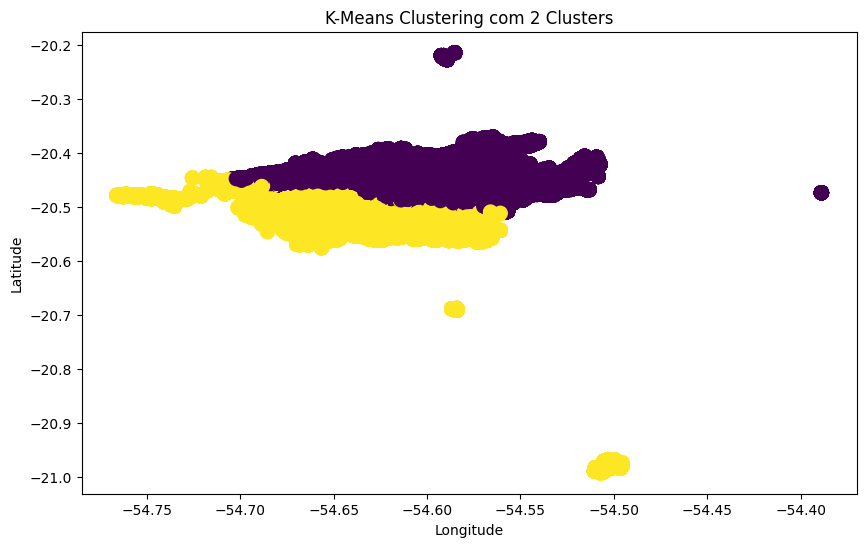

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


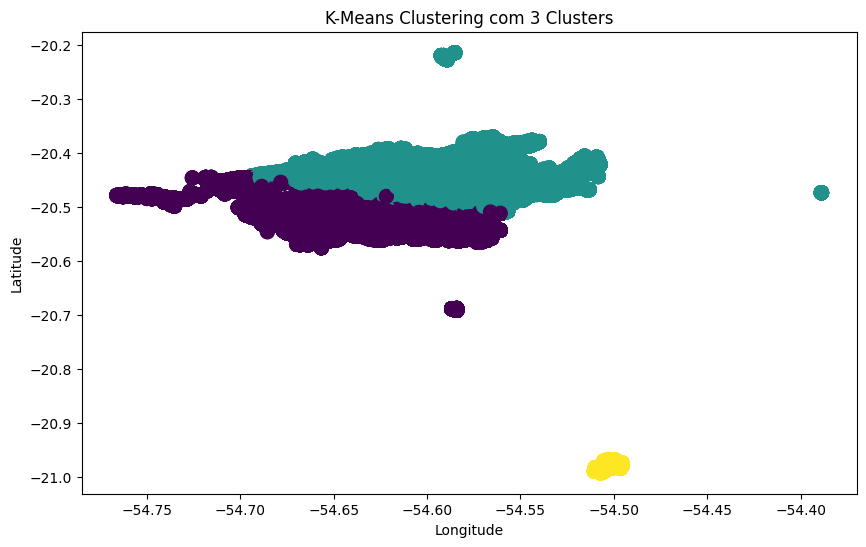

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


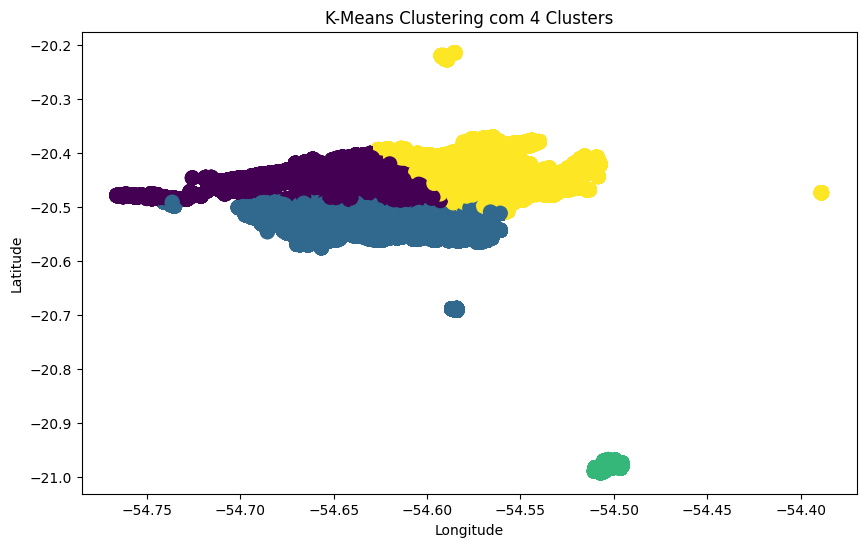

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


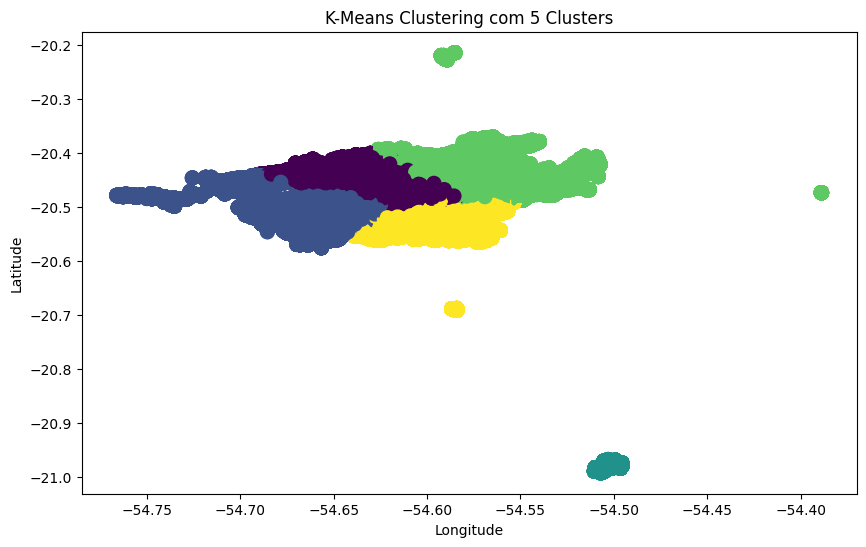

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


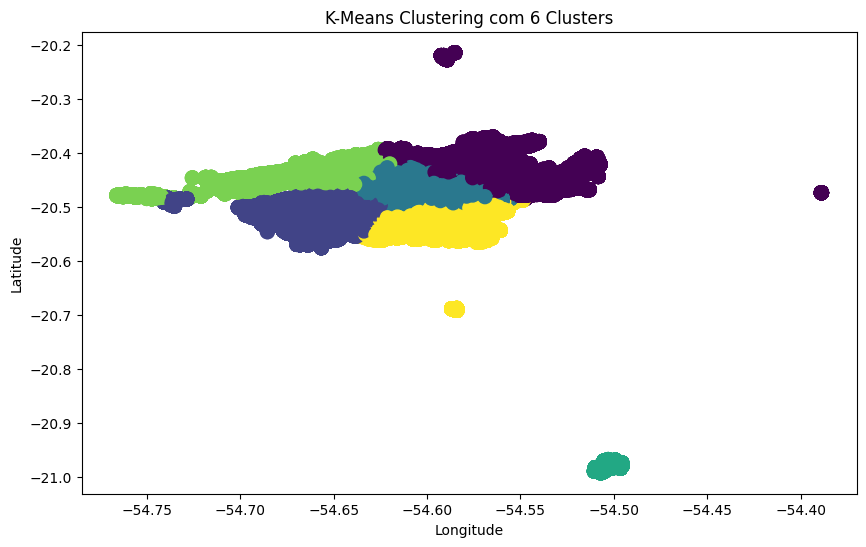

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


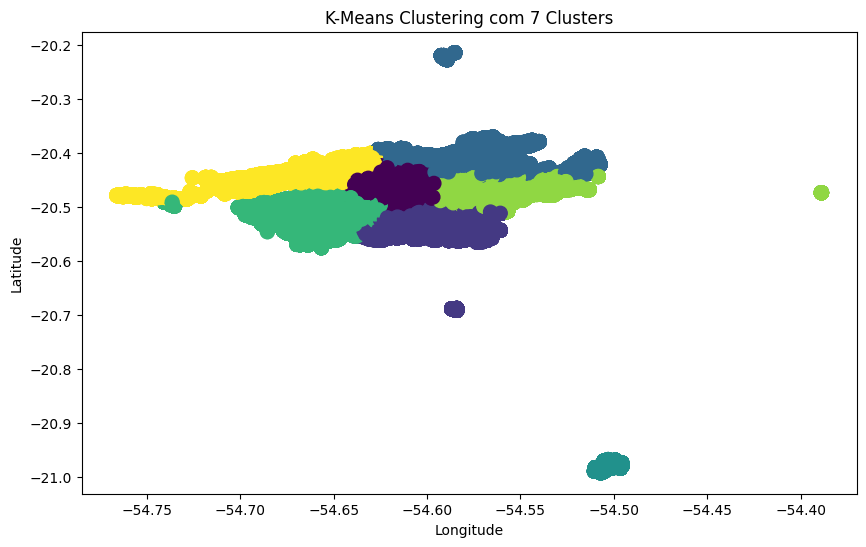

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


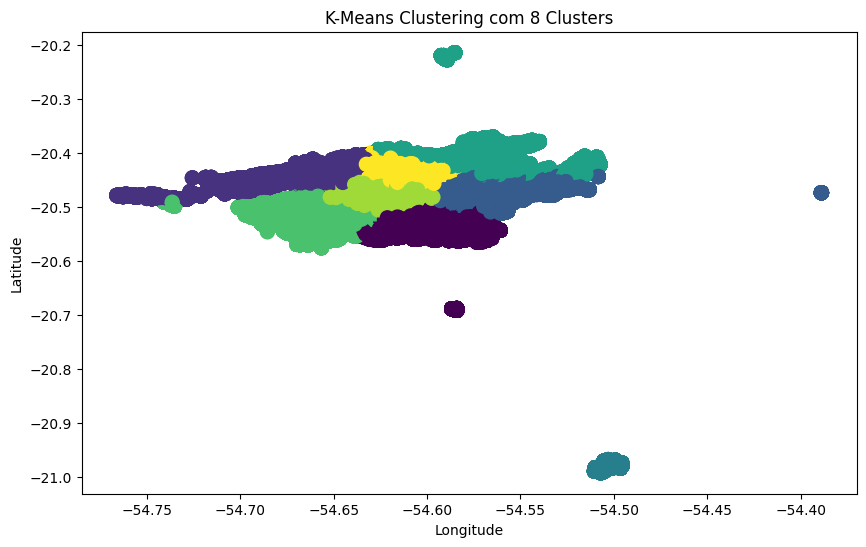

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


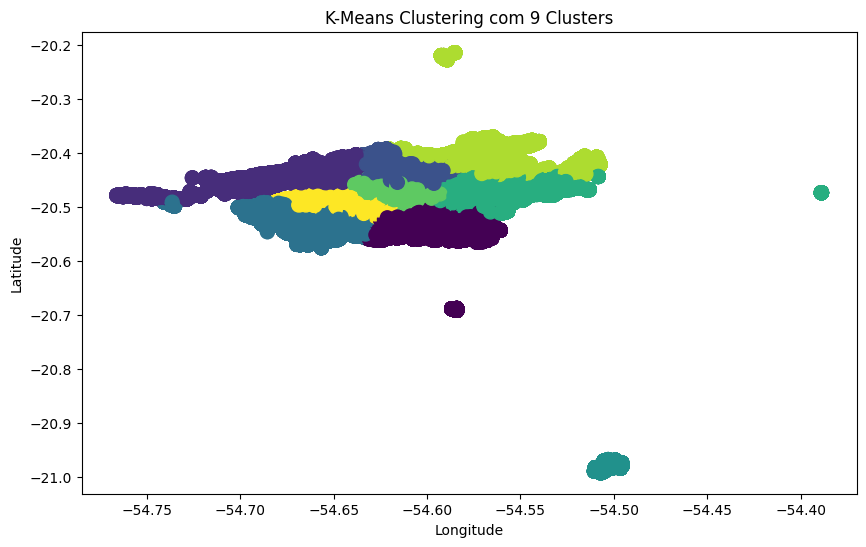

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


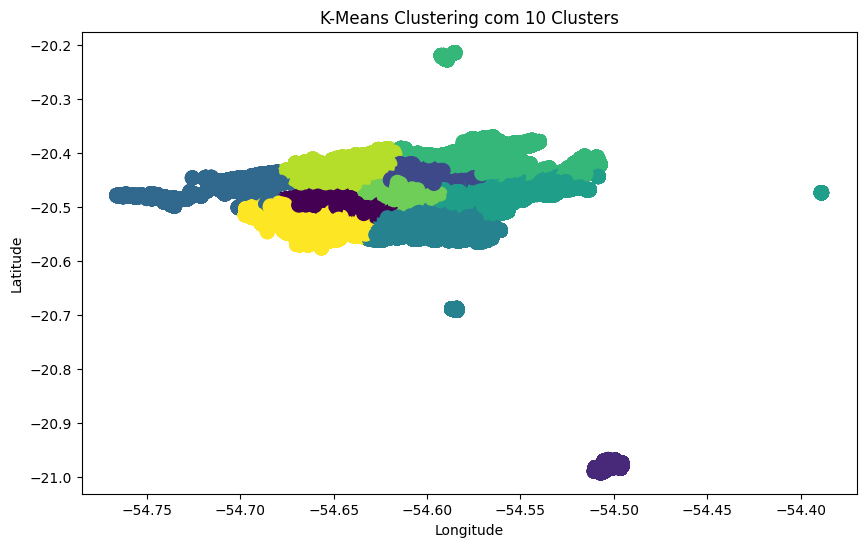

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


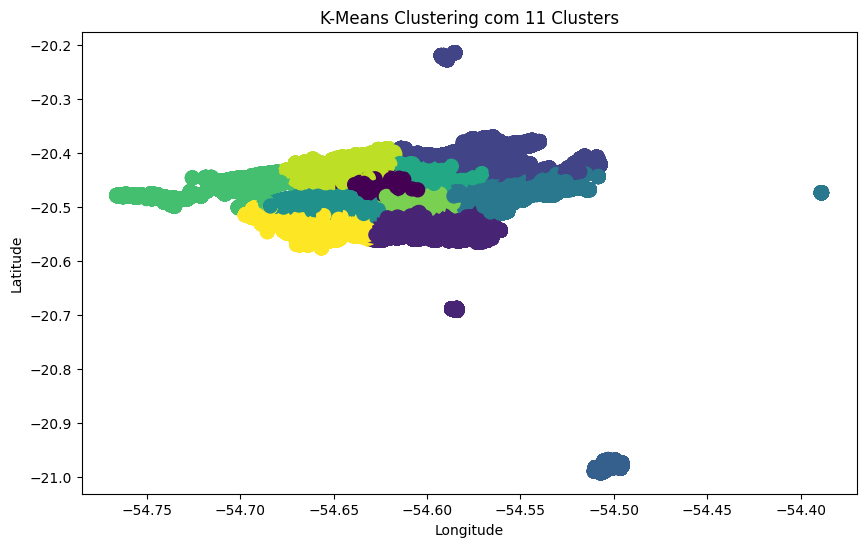

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


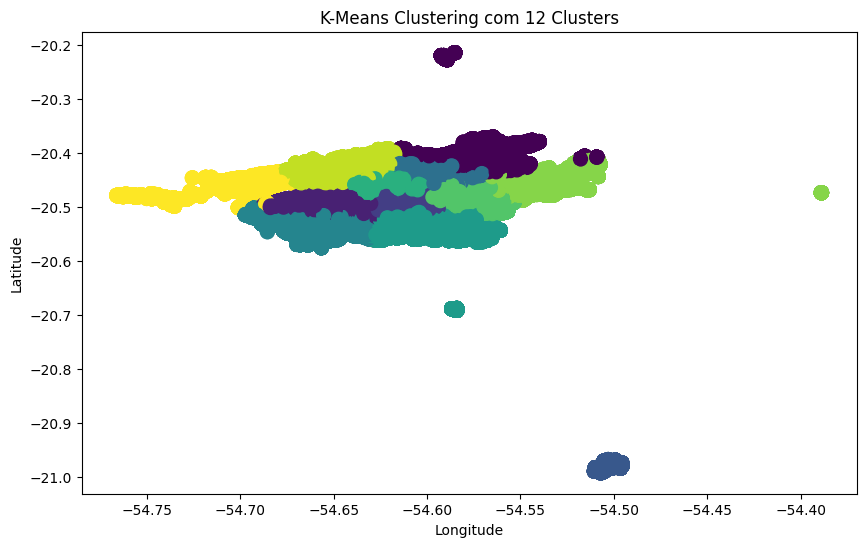

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


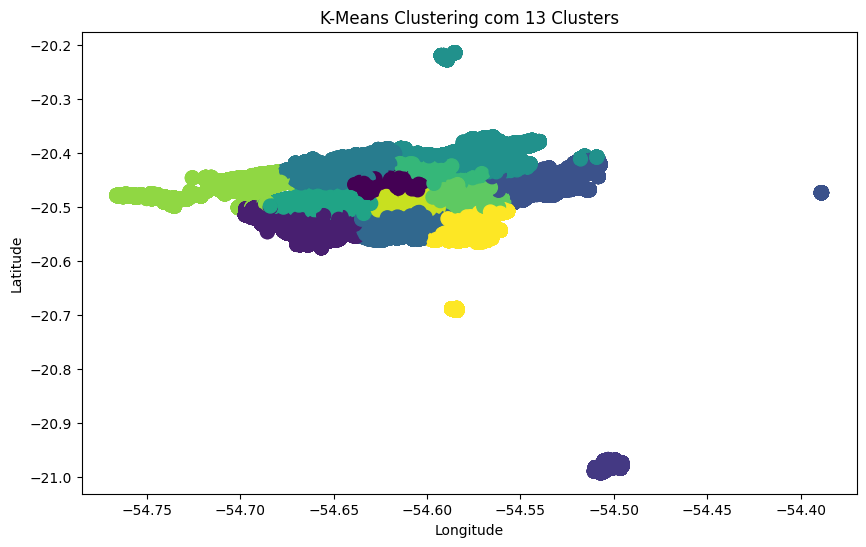

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


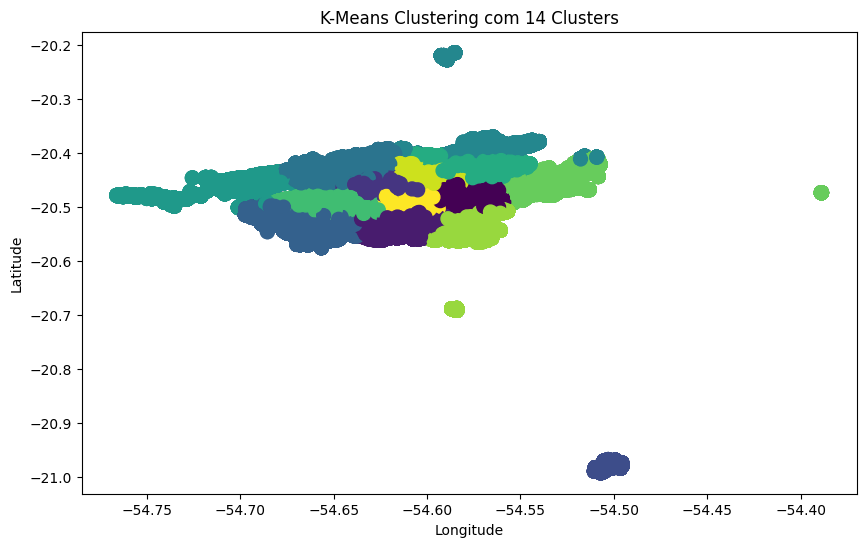

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


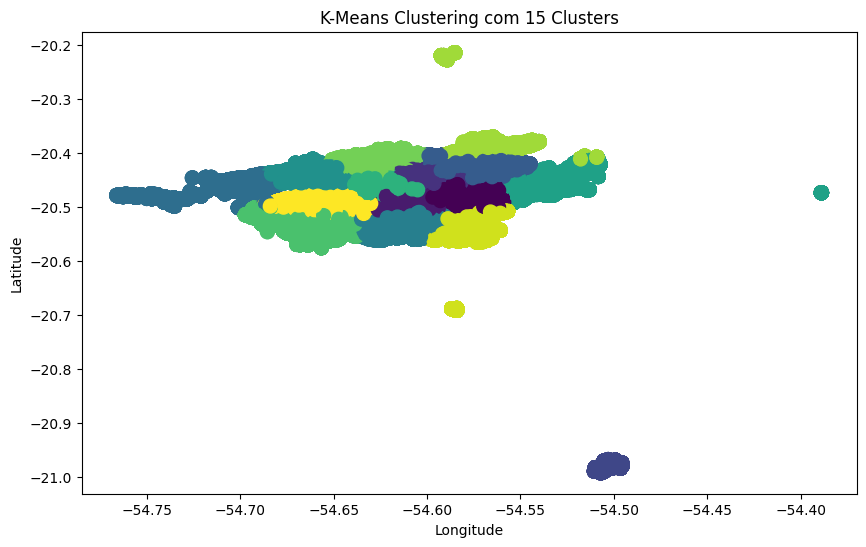

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


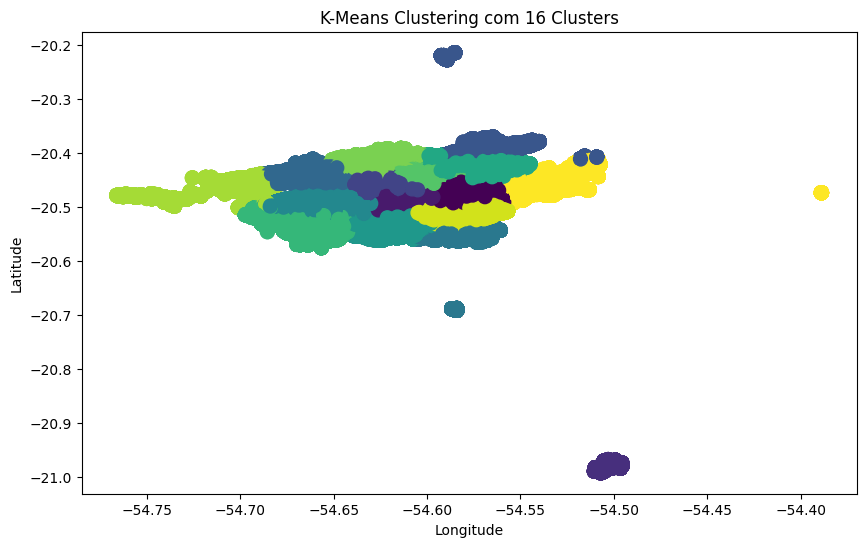

In [26]:
def plotar(n_clusters):

  df_temp = dataframe_pj_premissa.copy()
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  df_temp['cluster'] = kmeans.fit_predict(dataframe_pj_premissa[['COD_LATITUDE', 'COD_LONGITUDE']])

  # visualizando
  plt.figure(figsize=(10, 6))
  plt.scatter(dataframe_pj_premissa['COD_LONGITUDE'], dataframe_pj_premissa['COD_LATITUDE'], c=df_temp['cluster'], cmap='viridis', marker='o', s=100)
  plt.title(f"K-Means Clustering com {n_clusters} Clusters")
  plt.xlabel("Longitude")
  plt.ylabel("Latitude")
  plt.show()



# visulizar clusters do range de 2 para 17
for x in range(2, 17):
  print()
  plotar(x)

In [27]:
kmeans = KMeans(n_clusters=20, random_state=42)
dataframe_pj_premissa['cluster'] = kmeans.fit_predict(dataframe_pj_premissa[['COD_LATITUDE', 'COD_LONGITUDE']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
dataframe_pj_premissa = dataframe_pj_premissa.drop(columns=['COD_LATITUDE', 'COD_LONGITUDE'])

In [29]:
dataframe_pj_premissa = pd.get_dummies(dataframe_pj_premissa, columns = ['cluster'], dtype=int)

### Normalizando com o Robust Scaler

O RobustScaler é uma técnica de normalização usada para transformar dados. Ele é útil especialmente quando os dados contêm outliers, ou seja, valores atípicos que podem distorcer (neste caso o Consumo e o Volume) os resultados de outras técnicas de escalonamento, como StandardScaler ou MinMaxScaler.

O RobustScaler transforma os dados subtraindo a mediana e dividindo pela amplitude interquartil (IQR, Interquartile Range). A mediana é o valor do ponto médio quando os dados são ordenados, e o IQR é a diferença entre o terceiro quartil (75º percentil) e o primeiro quartil (25º percentil).

Esse método é menos sensível a outliers porque, ao contrário da média e do desvio padrão (usados pelo StandardScaler), a mediana e o IQR não são afetados por valores extremos.

In [30]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

dataframe_pj_premissa[['CONS_MEDIDO']] = scaler.fit_transform(dataframe_pj_premissa[['CONS_MEDIDO']])
dataframe_pj_premissa[['VOLUME_ESTIMADO']] = scaler.fit_transform(dataframe_pj_premissa[['VOLUME_ESTIMADO']])

In [31]:
pivoted_df = pd.pivot_table(
    dataframe_pj_premissa,
    index='MATRICULA',
    columns='REFERENCIA',
    values=['CONS_MEDIDO', 'VOLUME_ESTIMADO'],
    aggfunc='sum'
)

pivoted_df.columns = ['_'.join(col).strip() for col in pivoted_df.columns.values]
pivoted_df = pivoted_df.reset_index()

pivoted_df.head()

,MATRICULA,CONS_MEDIDO_2019-01-01,CONS_MEDIDO_2019-02-01,CONS_MEDIDO_2019-03-01,CONS_MEDIDO_2019-04-01,CONS_MEDIDO_2019-05-01,CONS_MEDIDO_2019-06-01,CONS_MEDIDO_2019-07-01,CONS_MEDIDO_2019-08-01,CONS_MEDIDO_2019-09-01,...,VOLUME_ESTIMADO_2023-11-01,VOLUME_ESTIMADO_2023-12-01,VOLUME_ESTIMADO_2024-01-01,VOLUME_ESTIMADO_2024-02-01,VOLUME_ESTIMADO_2024-03-01,VOLUME_ESTIMADO_2024-04-01,VOLUME_ESTIMADO_2024-05-01,VOLUME_ESTIMADO_2024-06-01,VOLUME_ESTIMADO_2024-07-01,VOLUME_ESTIMADO_2024-08-01
0,17075331.0,0.428571,0.571429,0.571429,NaN,1.714286,0.714286,0.714286,0.857143,0.857143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17075333.0,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17075335.0,-0.142857,0.000000,-0.142857,-0.142857,-0.142857,-0.428571,-0.285714,0.000000,1.285714,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17075337.0,-0.285714,-0.285714,-0.285714,0.285714,-0.142857,-0.142857,0.000000,-0.142857,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17075338.0,1.000000,0.571429,1.142857,1.285714,0.714286,1.000000,0.857143,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
len(pivoted_df)

46499

### Atribuição de cada uma das variáveis categóricas ao dataframe com o consumo e volume históricos

- É importante citar aqui que atribuímos a premissa que a primeira definição de tipo de ligação, descrição e os outros utilizados, serão os que tomaremos como base para inferência dentro do modelo

In [33]:
tipo_ligacao = dataframe_pj_premissa[['MATRICULA','TIPO_LIGACAO_Consumo Fixo', 'TIPO_LIGACAO_Hidrometrado']].drop_duplicates(subset='MATRICULA', keep='first')
pivoted_df = pivoted_df.merge(tipo_ligacao, on='MATRICULA', how='left').fillna(0)

In [34]:
descricao_ocorrencia = dataframe_pj_premissa[['MATRICULA','DSC_OCORRENCIA_MEDIDOR NÃO LOCALIZADO', 'DSC_OCORRENCIA_MEDIDOR RETIRADO/FURTADO', 'DSC_OCORRENCIA_NORMAL']].drop_duplicates(subset='MATRICULA', keep='first')
pivoted_df = pivoted_df.merge(descricao_ocorrencia, on='MATRICULA', how='left').fillna(0)

In [35]:
fraude_ou_não = dataframe_pj_premissa[['MATRICULA','DESCRICAO_IRREGULARIDADE IDENTIFICADA']].drop_duplicates(subset='MATRICULA', keep='first')
pivoted_df = pivoted_df.merge(fraude_ou_não, on='MATRICULA', how='left').fillna(0)

In [36]:
dataframe_pj_premissa.columns.values

array(['REFERENCIA', 'MATRICULA', 'CONS_MEDIDO', 'CATEGORIA',
       'SUB_CATEGORIA', 'VOLUME_ESTIMADO', 'VOLUME_ESTIMADO_ACUM',
       'FATURADO_MEDIA', 'TIPO_LIGACAO_Consumo Fixo',
       'TIPO_LIGACAO_Hidrometrado', 'DSC_OCORRENCIA_IMÓVEL DESOCUPADO',
       'DSC_OCORRENCIA_LEITURA COLETADA PELO CLIENTE',
       'DSC_OCORRENCIA_MEDIDOR NÃO LOCALIZADO',
       'DSC_OCORRENCIA_MEDIDOR RETIRADO/FURTADO', 'DSC_OCORRENCIA_NORMAL',
       'STA_TROCA_N', 'STA_TROCA_S', 'STA_ACEITA_LEITURA_N',
       'STA_ACEITA_LEITURA_S', 'DESCRICAO_IRREGULARIDADE IDENTIFICADA',
       'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9',
       'cluster_10', 'cluster_11', 'cluster_12', 'cluster_13',
       'cluster_14', 'cluster_15', 'cluster_16', 'cluster_17',
       'cluster_18', 'cluster_19'], dtype=object)

In [37]:
clusters = dataframe_pj_premissa[['MATRICULA','cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9',
       'cluster_10', 'cluster_11', 'cluster_12', 'cluster_13',
       'cluster_14', 'cluster_15', 'cluster_16', 'cluster_17',
       'cluster_18', 'cluster_19']].drop_duplicates(subset='MATRICULA', keep='first')
pivoted_df = pivoted_df.merge(clusters, on='MATRICULA', how='left').fillna(0)

In [38]:
pivoted_df = pivoted_df.fillna(0)

In [39]:
pivoted_df

,MATRICULA,CONS_MEDIDO_2019-01-01,CONS_MEDIDO_2019-02-01,CONS_MEDIDO_2019-03-01,CONS_MEDIDO_2019-04-01,CONS_MEDIDO_2019-05-01,CONS_MEDIDO_2019-06-01,CONS_MEDIDO_2019-07-01,CONS_MEDIDO_2019-08-01,CONS_MEDIDO_2019-09-01,...,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19
0,17075331.0,0.428571,0.571429,0.571429,0.000000,1.714286,0.714286,0.714286,0.857143,0.857143,...,0,0,0,0,0,0,1,0,0,0
1,17075333.0,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,...,0,0,0,0,0,0,1,0,0,0
2,17075335.0,-0.142857,0.000000,-0.142857,-0.142857,-0.142857,-0.428571,-0.285714,0.000000,1.285714,...,0,0,0,0,0,0,1,0,0,0
3,17075337.0,-0.285714,-0.285714,-0.285714,0.285714,-0.142857,-0.142857,0.000000,-0.142857,0.000000,...,0,0,0,0,0,0,1,0,0,0
4,17075338.0,1.000000,0.571429,1.142857,1.285714,0.714286,1.000000,0.857143,1.000000,1.000000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46494,17997580.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
46495,17997582.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
46496,17997584.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
46497,17997585.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0


In [40]:
colunas_data = ['CONS_MEDIDO_2019-01-01', 'CONS_MEDIDO_2019-02-01',
       'CONS_MEDIDO_2019-03-01', 'CONS_MEDIDO_2019-04-01',
       'CONS_MEDIDO_2019-05-01', 'CONS_MEDIDO_2019-06-01',
       'CONS_MEDIDO_2019-07-01', 'CONS_MEDIDO_2019-08-01',
       'CONS_MEDIDO_2019-09-01', 'CONS_MEDIDO_2019-10-01',
       'CONS_MEDIDO_2019-11-01', 'CONS_MEDIDO_2019-12-01',
       'CONS_MEDIDO_2022-01-01', 'CONS_MEDIDO_2022-02-01',
       'CONS_MEDIDO_2022-03-01', 'CONS_MEDIDO_2022-04-01',
       'CONS_MEDIDO_2022-05-01', 'CONS_MEDIDO_2022-06-01',
       'CONS_MEDIDO_2022-07-01', 'CONS_MEDIDO_2022-08-01',
       'CONS_MEDIDO_2022-09-01', 'CONS_MEDIDO_2022-10-01',
       'CONS_MEDIDO_2022-11-01', 'CONS_MEDIDO_2022-12-01',
       'CONS_MEDIDO_2023-01-01', 'CONS_MEDIDO_2023-02-01',
       'CONS_MEDIDO_2023-03-01', 'CONS_MEDIDO_2023-04-01',
       'CONS_MEDIDO_2023-05-01', 'CONS_MEDIDO_2023-06-01',
       'CONS_MEDIDO_2023-07-01', 'CONS_MEDIDO_2023-08-01',
       'CONS_MEDIDO_2023-09-01', 'CONS_MEDIDO_2023-10-01',
       'CONS_MEDIDO_2023-11-01', 'CONS_MEDIDO_2023-12-01',
       'CONS_MEDIDO_2024-01-01', 'CONS_MEDIDO_2024-02-01',
       'CONS_MEDIDO_2024-03-01', 'CONS_MEDIDO_2024-04-01',
       'CONS_MEDIDO_2024-05-01', 'CONS_MEDIDO_2024-06-01',
       'CONS_MEDIDO_2024-07-01', 'CONS_MEDIDO_2024-08-01']

In [41]:
np.unique(pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA'].values, return_counts=True)

(array([0., 1.]), array([32453, 14046]))

## Rodando o modelo

### Divisão de Treino e Teste

In [42]:
pivoted_df.shape

(46499, 115)

#### Balanceando os dados com Smote (Synthetic Minority Over-sampling Technique)

O smote é uma técnica de "oversampling" usada para balancear datasets com o objetivo de aumentar a quantidade de amostras da classe minoritária gerando novos exemplos sintéticos, em vez de simplesmente replicar os dados existentes. Isso ajuda a melhorar a performance de modelos de machine learning ao treinar com um dataset mais balanceado.

Quando você treina um modelo de machine learning com um dataset desbalanceado (onde uma classe tem muito mais exemplos do que a outra), o modelo tende a favorecer a classe majoritária.

Como resultado, o modelo pode ter um bom desempenho em termos de acurácia geral, mas um desempenho ruim ao identificar a classe minoritária (por exemplo, falhas, fraudes, etc.).

O Smote ajuda a mitigar esse problema ao balancear o dataset, aumentando o número de exemplos da classe minoritária.

In [43]:
def balanciar(df):
  smote = SMOTE(random_state=42)
  X = pivoted_df.drop('DESCRICAO_IRREGULARIDADE IDENTIFICADA', axis=1)
  y = pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA']
  X_res, y_res = smote.fit_resample(X, y)
  return pd.concat([X_res, y_res], axis=1)

In [44]:
# from imblearn.under_sampling import RandomUnderSampler

# def balanciar(df):
#   rus = RandomUnderSampler(random_state=42)
#   X = pivoted_df.drop('DESCRICAO_IRREGULARIDADE IDENTIFICADA', axis=1)
#   y = pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA']
#   X_res, y_res = rus.fit_resample(X, y)
#   return pd.concat([X_res, y_res], axis=1)

In [45]:
# pivoted_df = balanciar(pivoted_df)

In [46]:
np.unique(pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA'].values, return_counts=True)

(array([0., 1.]), array([32453, 14046]))

In [47]:
pivoted_df = balanciar(pivoted_df.fillna(0))

In [48]:
pivoted_df.columns

Index(['MATRICULA', 'CONS_MEDIDO_2019-01-01', 'CONS_MEDIDO_2019-02-01',
       'CONS_MEDIDO_2019-03-01', 'CONS_MEDIDO_2019-04-01',
       'CONS_MEDIDO_2019-05-01', 'CONS_MEDIDO_2019-06-01',
       'CONS_MEDIDO_2019-07-01', 'CONS_MEDIDO_2019-08-01',
       'CONS_MEDIDO_2019-09-01',
       ...
       'cluster_11', 'cluster_12', 'cluster_13', 'cluster_14', 'cluster_15',
       'cluster_16', 'cluster_17', 'cluster_18', 'cluster_19',
       'DESCRICAO_IRREGULARIDADE IDENTIFICADA'],
      dtype='object', length=115)

In [49]:
y = pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA'].values
X = pivoted_df.drop(['MATRICULA','DESCRICAO_IRREGULARIDADE IDENTIFICADA'], axis=1).values

In [50]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

In [51]:
import tensorflow.keras as keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    keras.layers.Dense(8, activation='relu'),
    layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          14,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,601 (100.00 KB)

 Trainable params: 25,601 (100.00 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall'])

In [54]:
x_train.shape

(45434, 113)

In [55]:
y_train.shape

(45434,)

In [56]:
x_val.shape

(19472, 113)

In [57]:
y_val.shape

(19472,)

In [58]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

result = model.fit(x_train, y_train, epochs=45, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/45
710/710 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5279 - loss: 0.7525 - precision: 0.5259 - recall: 0.5764 - val_accuracy: 0.6007 - val_loss: 0.6656 - val_precision: 0.5821 - val_recall: 0.7013
Epoch 2/45
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6003 - loss: 0.6862 - precision: 0.5778 - recall: 0.7354 - val_accuracy: 0.6643 - val_loss: 0.6346 - val_precision: 0.6642 - val_recall: 0.6586
Epoch 3/45
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6462 - loss: 0.6475 - precision: 0.6326 - recall: 0.6927 - val_accuracy: 0.6734 - val_loss: 0.6197 - val_precision: 0.6790 - val_recall: 0.6520
Epoch 4/45
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6581 - loss: 0.6322 - precision: 0.6531 - recall: 0.6747 - val_accuracy: 0.6866 - val_loss: 0.5988 - val_precision: 0.7432 - val_recall: 0.5660
Epoch 5/45
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6590 - loss: 0.6210 - precision: 0.6630 - recall: 0.6522 - val_accuracy: 0.6854 - val_loss: 0

In [59]:
history = result.history
fig = px.line(x=list(range(1, 46)), y=history['loss'], labels={'x': 'Épocas', 'y': 'Perda'}, title='Função de Custo durante o Treinamento')
fig.update_traces(mode='lines+markers')
fig.show()

609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


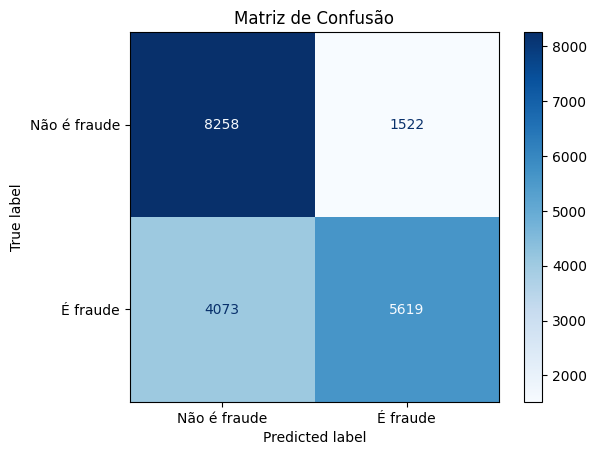

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import load_model

y_pred = model.predict(x_val)
y_pred = np.round(y_pred).astype(int)

cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não é fraude", "É fraude"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

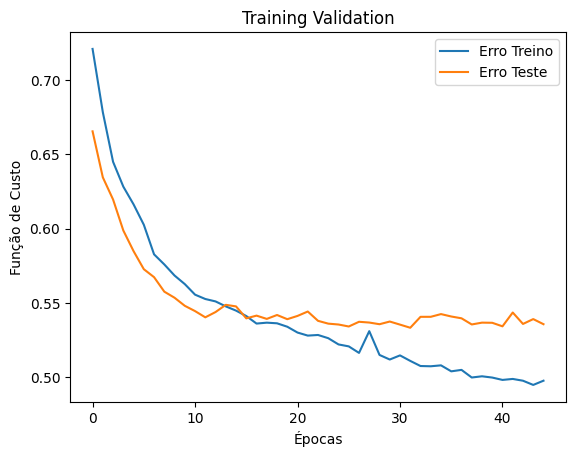

In [61]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend(['Erro Treino', 'Erro Teste'])
plt.xlabel('Épocas')
plt.ylabel('Função de Custo')
plt.title('Training Validation')
plt.show()

In [62]:
fig = go.Figure()

fig.add_trace(go.Line(x=list(range(1, 26)), y=history['accuracy'], mode='lines+markers', name='Precisão de Treinamento'))

fig.add_trace(go.Line(x=list(range(1, 26)), y=history['val_loss'], mode='lines+markers', name='Perda de Validação'))

fig.update_layout(title='Precisão e Perda durante o Treinamento', xaxis_title='Épocas', yaxis_title='Valor', legend_title='Métrica')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




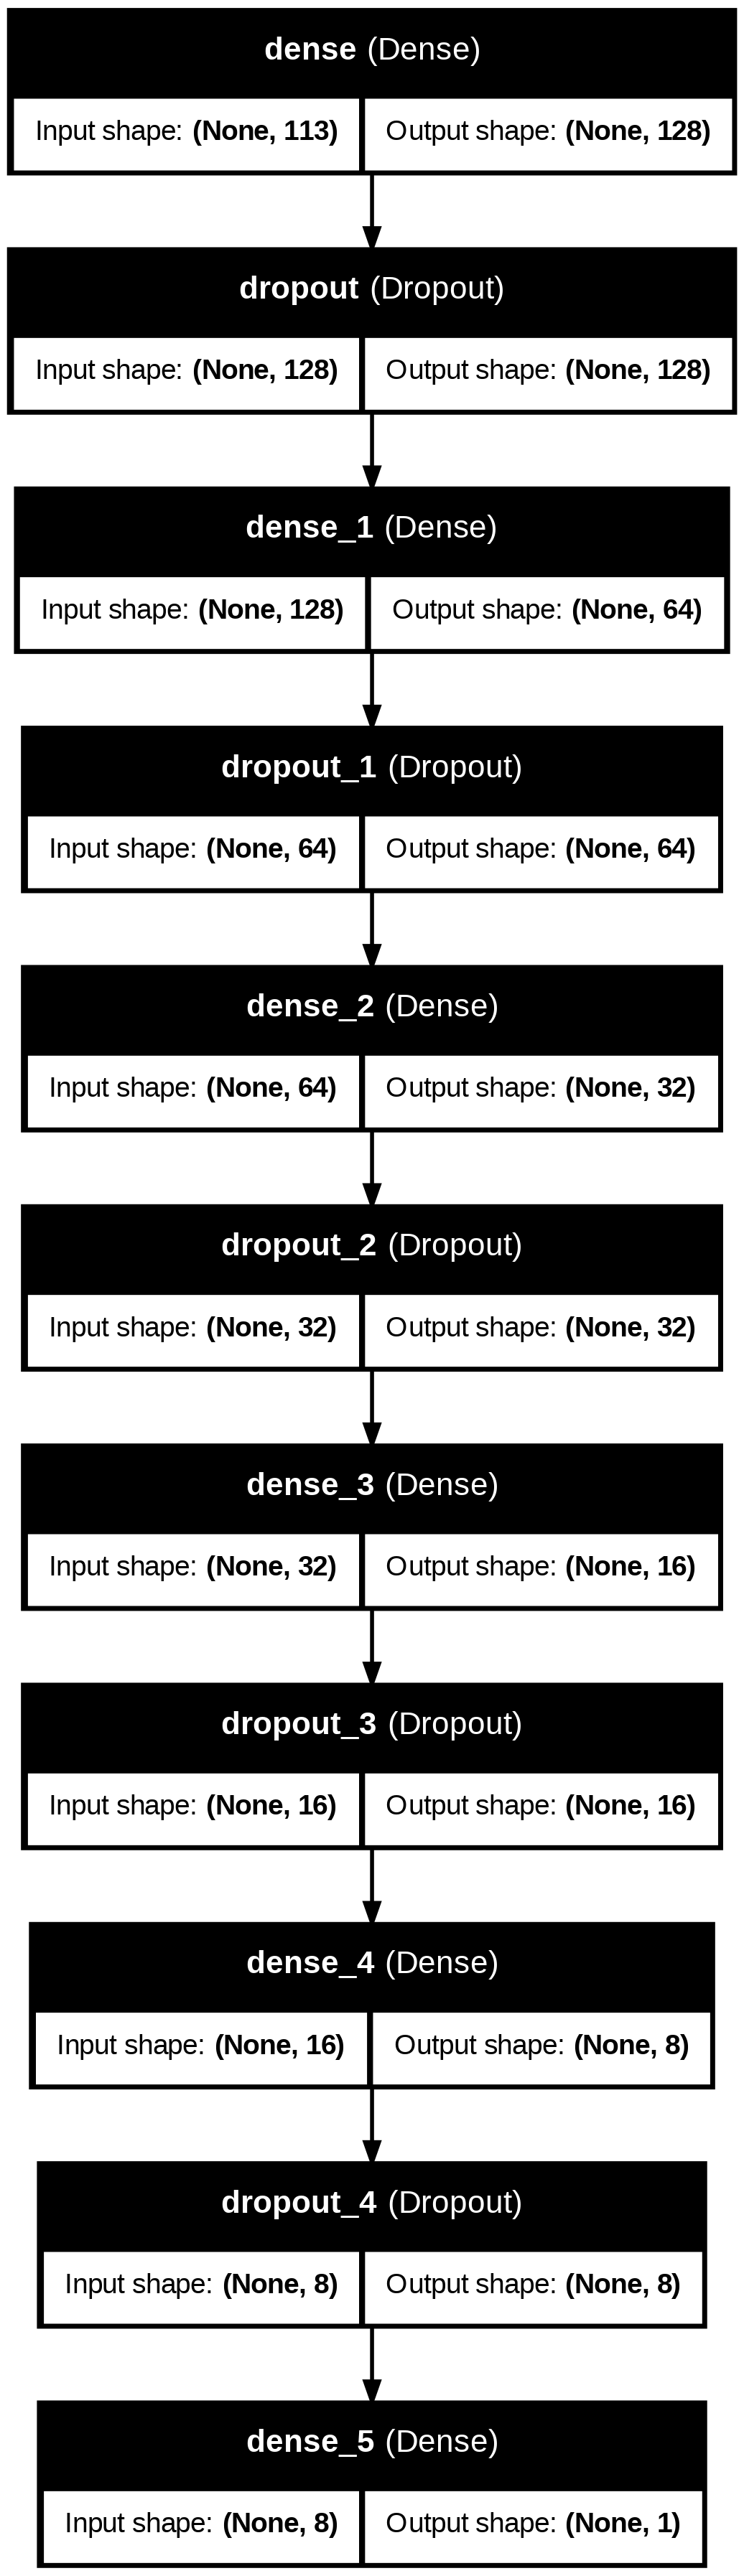

In [63]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

## Agregação de hiperparâmetros

In [64]:
%pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00


### Otimização Bayesiana

In [65]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Definindo a função objetivo
def objective(params):
    learning_rate, num_neurons, batch_size, dropout_rate = params

    # Pegando a última 'val_loss' como métrica para otimização
    val_loss = result.history['val_loss'][-1]
    return val_loss

# Definindo o espaço de busca
space = [
    Real(1e-4, 1e-2, "log-uniform", name='learning_rate'),  # Taxa de aprendizado
    Integer(16, 256, name='num_neurons'),                 # Número de neurônios
    Integer(16, 128, name='batch_size'),                   # Tamanho do batch
    Real(0.1, 0.5, name='dropout_rate')                   # Olhar pro dropout
]

# Otimizando usando a otimização bayesiana
result = gp_minimize(objective, space, n_calls=30, random_state=42)

print(f"Melhores hiperparâmetros: {result.x}")
print(f"Menor val_loss: {result.fun}")

Melhores hiperparâmetros: [0.003918194347141745, 60, 103, 0.33874006317859484]
Menor val_loss: 0.535683810710907


In [66]:
print(f"Melhor taxa de aprendizado: {result.x[0]}, Melhor número de neurônios: {result.x[1]}")

Melhor taxa de aprendizado: 0.003918194347141745, Melhor número de neurônios: 60


### Random Search

In [67]:
def create_model(learning_rate=0.001, dropout_rate=0.2):
    model = keras.Sequential([
        keras.layers.Input(shape=(x_train.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        keras.layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate),
        keras.layers.Dense(32, activation='relu'),
        layers.Dropout(dropout_rate),
        keras.layers.Dense(16, activation='relu'),
        layers.Dropout(dropout_rate),
        keras.layers.Dense(8, activation='relu'),
        layers.Dropout(dropout_rate),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [68]:
%pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 100.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [69]:
from sklearn.metrics import fbeta_score, make_scorer, accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier


model = KerasClassifier(model=create_model, optimizer='adam')

param_dist = {
    'batch_size': [64, 128],
    'epochs': [30, 45],
}

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1,
    scoring=scoring,
    refit='accuracy'
)

random_search.fit(x_train, y_train)

print(random_search.best_params_)
best_model = random_search.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning:

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.



474/474 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.5205 - loss: 0.7059
Epoch 2/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5096 - loss: 0.6945
Epoch 3/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5375 - loss: 0.6919
Epoch 4/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5940 - loss: 0.6722
Epoch 5/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6258 - loss: 0.6564
Epoch 6/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6381 - loss: 0.6478
Epoch 7/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6541 - loss: 0.6328
Epoch 8/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6647 - loss: 0.6164
Epoch 9/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6745 - loss: 0.6025
Epoch 10/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6736 - loss: 0.5902
Epoch 11/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6798 - loss: 0.5758
Epoch 12/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accura

In [72]:
%pip install imblearn keras_tuner keras scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


### Rodando random search para a entender qual é a melhor definição do modelo

Iteração anteriormente utilizada para o modelo PF, mas agora agregada para o modelo PJ

In [73]:
import keras_tuner as kt
# Definindo a função para construir o modelo
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(x_train.shape[1],)))

    # Hyperparameters para o número de unidades nas camadas
    for i in range(hp.Int('num_layers', 2, 4)):  # entre 2 e 4 camadas densas
        model.add(keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=64, max_value=512, step=64), activation='relu'))
        model.add(keras.layers.Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Hyperparameters para o otimizador e a taxa de aprendizado
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision'])

    return model

# Definindo o tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='keras_tuning')

# Iniciando o grid search
tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Trial 10 Complete [00h 01m 41s]
val_accuracy: 0.7002619206905365

Best val_accuracy So Far: 0.7029067575931549
Total elapsed time: 00h 14m 52s


### Testando LSTM

A Long Short-Term Memory (LSTM) é uma arquitetura de rede neural recorrente (RNN) que foi projetada especificamente para aprender dependências de longo prazo em sequências de dados.

Essa capacidade de aprender padrões complexos ao longo do tempo torna as LSTMs particularmente úteis para identificar situações de fraude, onde os padrões fraudulentos podem ser sutis, raros e distribuídos ao longo do tempo.

In [102]:
pivoted_df.columns.values

array(['MATRICULA', 'CONS_MEDIDO_2019-01-01', 'CONS_MEDIDO_2019-02-01',
       'CONS_MEDIDO_2019-03-01', 'CONS_MEDIDO_2019-04-01',
       'CONS_MEDIDO_2019-05-01', 'CONS_MEDIDO_2019-06-01',
       'CONS_MEDIDO_2019-07-01', 'CONS_MEDIDO_2019-08-01',
       'CONS_MEDIDO_2019-09-01', 'CONS_MEDIDO_2019-10-01',
       'CONS_MEDIDO_2019-11-01', 'CONS_MEDIDO_2019-12-01',
       'CONS_MEDIDO_2022-01-01', 'CONS_MEDIDO_2022-02-01',
       'CONS_MEDIDO_2022-03-01', 'CONS_MEDIDO_2022-04-01',
       'CONS_MEDIDO_2022-05-01', 'CONS_MEDIDO_2022-06-01',
       'CONS_MEDIDO_2022-07-01', 'CONS_MEDIDO_2022-08-01',
       'CONS_MEDIDO_2022-09-01', 'CONS_MEDIDO_2022-10-01',
       'CONS_MEDIDO_2022-11-01', 'CONS_MEDIDO_2022-12-01',
       'CONS_MEDIDO_2023-01-01', 'CONS_MEDIDO_2023-02-01',
       'CONS_MEDIDO_2023-03-01', 'CONS_MEDIDO_2023-04-01',
       'CONS_MEDIDO_2023-05-01', 'CONS_MEDIDO_2023-06-01',
       'CONS_MEDIDO_2023-07-01', 'CONS_MEDIDO_2023-08-01',
       'CONS_MEDIDO_2023-09-01', 'CONS_MEDI

Conversando com o orientador César, optamos por seguir com a proposta de dividir os dados categóricos dos númericos, visto que a LSTM poderia interpretar os valores categóricos como parte ou sequência dos numéricos

In [113]:
X_numeric_seq = pivoted_df.drop(['MATRICULA','DESCRICAO_IRREGULARIDADE IDENTIFICADA', 'TIPO_LIGACAO_Consumo Fixo', 'TIPO_LIGACAO_Hidrometrado',
       'DSC_OCORRENCIA_MEDIDOR NÃO LOCALIZADO',
       'DSC_OCORRENCIA_MEDIDOR RETIRADO/FURTADO', 'DSC_OCORRENCIA_NORMAL',
       'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9',
       'cluster_10', 'cluster_11', 'cluster_12', 'cluster_13',
       'cluster_14', 'cluster_15', 'cluster_16', 'cluster_17',
       'cluster_18', 'cluster_19'], axis=1).values
X_categorical_seq = pivoted_df[['TIPO_LIGACAO_Consumo Fixo', 'TIPO_LIGACAO_Hidrometrado',
       'DSC_OCORRENCIA_MEDIDOR NÃO LOCALIZADO',
       'DSC_OCORRENCIA_MEDIDOR RETIRADO/FURTADO', 'DSC_OCORRENCIA_NORMAL',
       'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9',
       'cluster_10', 'cluster_11', 'cluster_12', 'cluster_13',
       'cluster_14', 'cluster_15', 'cluster_16', 'cluster_17',
       'cluster_18', 'cluster_19']].values
y_seq = pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA'].values

In [118]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate

# Divisão de dados em treino e teste
X_train_num, X_test_num, X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_numeric_seq, X_categorical_seq, y_seq, test_size=0.2, random_state=42)

# Definindo a entrada da sequência numérica
numeric_input = Input(shape=(X_numeric_seq.shape[1], 1), name='numeric_input')

# Camada LSTM para variáveis numéricas
x_numeric = LSTM(64, return_sequences=False)(numeric_input)

# Definindo a entrada da sequência categórica
categorical_input = Input(shape=(X_categorical_seq.shape[1],), name='categorical_input')

# Camada Densa para variáveis categóricas
x_categorical = Dense(32, activation='relu')(categorical_input)

# Concatenando as saídas das camadas numéricas e categóricas
concatenated = Concatenate()([x_numeric, x_categorical])

# Camada Densa final
output = Dense(1, activation='sigmoid')(concatenated)

# Criando o modelo
model_lstm = Model(inputs=[numeric_input, categorical_input], outputs=output)

# Compilando o modelo
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])

# Reshape necessário para a entrada numérica
X_train_num = np.expand_dims(X_train_num, axis=-1)
X_test_num = np.expand_dims(X_test_num, axis=-1)

# Treinamento do modelo
model_lstm.fit([X_train_num, X_train_cat], y_train, epochs=50, batch_size=81, validation_split=0.2)

# Avaliação do modelo
# Avaliação do modelo
loss, accuracy, precision, recall = model_lstm.evaluate([X_test_num, X_test_cat], y_test) # Changed model to model_lstm and added precision and recall to unpack the returned values
print(f'Test Loss: {loss:.4f}')
print(f'Model Accuracy: {accuracy:.2f}')
print(f'Model Precision: {precision:.2f}')
print(f'Model Recall: {recall:.2f}')

Epoch 1/50
513/513 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6074 - loss: 0.6630 - precision: 0.6297 - recall: 0.5537 - val_accuracy: 0.6883 - val_loss: 0.5961 - val_precision: 0.7439 - val_recall: 0.5678
Epoch 2/50
513/513 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6848 - loss: 0.5835 - precision: 0.7469 - recall: 0.5560 - val_accuracy: 0.6932 - val_loss: 0.5591 - val_precision: 0.8358 - val_recall: 0.4757
Epoch 3/50
513/513 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6975 - loss: 0.5536 - precision: 0.8144 - recall: 0.5060 - val_accuracy: 0.6942 - val_loss: 0.5466 - val_precision: 0.7874 - val_recall: 0.5263
Epoch 4/50
513/513 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6971 - loss: 0.5429 - precision: 0.8000 - recall: 0.5287 - val_accuracy: 0.6967 - val_loss: 0.5456 - val_precision: 0.8765 - val_recall: 0.4530
Epoch 5/50
513/513 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7007 - loss: 0.5399 - precision: 0.8168 - recall: 0.5198 - val_accuracy: 0.6952 - val_loss: 0.

In [120]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.0 MB/s eta 0:00:00


In [121]:
import optuna
import numpy as np
from sklearn.metrics import recall_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [124]:
def objective(trial):
    # Definindo os hiperparâmetros para otimização
    n_lstm_units = trial.suggest_int('n_lstm_units', 32, 128)
    n_dense_units = trial.suggest_int('n_dense_units', 16, 64)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
    epochs = trial.suggest_int('epochs', 10, 100)

    # Definindo a entrada da sequência numérica
    numeric_input = Input(shape=(X_numeric_seq.shape[1], 1), name='numeric_input')
    x_numeric = LSTM(n_lstm_units, return_sequences=False, dropout=dropout_rate)(numeric_input)

    # Definindo a entrada da sequência categórica
    categorical_input = Input(shape=(X_categorical_seq.shape[1],), name='categorical_input')
    x_categorical = Dense(n_dense_units, activation='relu')(categorical_input)

    # Concatenando as saídas das camadas numéricas e categóricas
    concatenated = Concatenate()([x_numeric, x_categorical])
    output = Dense(1, activation='sigmoid')(concatenated)

    # Criando o modelo
    model_lstm = Model(inputs=[numeric_input, categorical_input], outputs=output)

    # Compilando o modelo
    model_lstm.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    # Reshape necessário para a entrada numérica
    X_numeric_train_reshaped = np.expand_dims(X_train_num, axis=-1)
    X_numeric_test_reshaped = np.expand_dims(X_test_num, axis=-1)

    # Treinamento do modelo
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Predição e cálculo do recall
    y_pred = model_lstm.predict([X_numeric_test_reshaped, X_test_cat])
    y_pred_classes = (y_pred > 0.5).astype(int)
    recall = recall_score(y_test, y_pred_classes)

    # Limpando sessão do Keras para evitar sobrecarga de memória
    K.clear_session()

    return recall

# Rodando a otimização
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

# Melhor conjunto de hiperparâmetros
print("Melhores hiperparâmetros:", study.best_params)
print("Melhor recall alcançado:", study.best_value)

[I 2024-09-14 03:26:17,294] A new study created in memory with name: no-name-8327d2da-cc00-4527-b155-4be9767c117e
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


[I 2024-09-14 03:26:19,989] Trial 0 finished with value: 0.7903647837463444 and parameters: {'n_lstm_units': 57, 'n_dense_units': 51, 'dropout_rate': 0.4211506673721873, 'learning_rate': 2.388915270206368e-05, 'batch_size': 32, 'epochs': 68}. Best is trial 0 with value: 0.7903647837463444.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


[I 2024-09-14 03:26:22,635] Trial 1 finished with value: 0.8941049715253194 and parameters: {'n_lstm_units': 41, 'n_dense_units': 17, 'dropout_rate': 0.11240874565502015, 'learning_rate': 0.0005019794489163659, 'batch_size': 128, 'epochs': 73}. Best is trial 1 with value: 0.8941049715253194.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


[I 2024-09-14 03:26:25,186] Trial 2 finished with value: 0.13436970909650608 and parameters: {'n_lstm_units': 64, 'n_dense_units': 59, 'dropout_rate': 0.23527648087452385, 'learning_rate': 0.009139658248691014, 'batch_size': 16, 'epochs': 70}. Best is trial 1 with value: 0.8941049715253194.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:26:27,693] Trial 3 finished with value: 0.7241803909496691 and parameters: {'n_lstm_units': 105, 'n_dense_units': 60, 'dropout_rate': 0.33522562383992016, 'learning_rate': 0.0027921200707796334, 'batch_size': 64, 'epochs': 57}. Best is trial 1 with value: 0.8941049715253194.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:26:30,241] Trial 4 finished with value: 0.09635216253655533 and parameters: {'n_lstm_units': 43, 'n_dense_units': 56, 'dropout_rate': 0.1146811200914975, 'learning_rate': 0.0012453146697499304, 'batch_size': 16, 'epochs': 91}. Best is trial 1 with value: 0.8941049715253194.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:26:32,748] Trial 5 finished with value: 0.9410497152531938 and parameters: {'n_lstm_units': 52, 'n_dense_units': 64, 'dropout_rate': 0.43178231982407855, 'learning_rate': 1.4443020170065225e-05, 'batch_size': 32, 'epochs': 89}. Best is trial 5 with value: 0.9410497152531938.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


[I 2024-09-14 03:26:35,379] Trial 6 finished with value: 0.9984608280744959 and parameters: {'n_lstm_units': 91, 'n_dense_units': 56, 'dropout_rate': 0.20429870444761514, 'learning_rate': 0.0007266933437136587, 'batch_size': 128, 'epochs': 84}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


[I 2024-09-14 03:26:38,007] Trial 7 finished with value: 0.07480375557949823 and parameters: {'n_lstm_units': 33, 'n_dense_units': 48, 'dropout_rate': 0.21846739039129626, 'learning_rate': 6.892652951111167e-05, 'batch_size': 64, 'epochs': 77}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


[I 2024-09-14 03:26:40,602] Trial 8 finished with value: 0.2902878251500693 and parameters: {'n_lstm_units': 56, 'n_dense_units': 64, 'dropout_rate': 0.39856784413044366, 'learning_rate': 0.0013712840093995408, 'batch_size': 32, 'epochs': 92}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:26:43,067] Trial 9 finished with value: 0.997383407726643 and parameters: {'n_lstm_units': 66, 'n_dense_units': 26, 'dropout_rate': 0.23753578587244306, 'learning_rate': 0.001722461268904601, 'batch_size': 64, 'epochs': 82}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:26:45,615] Trial 10 finished with value: 0.34877635831922427 and parameters: {'n_lstm_units': 99, 'n_dense_units': 37, 'dropout_rate': 0.3133936336401472, 'learning_rate': 0.00011736410022478741, 'batch_size': 128, 'epochs': 25}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:26:48,171] Trial 11 finished with value: 0.6045867323380022 and parameters: {'n_lstm_units': 80, 'n_dense_units': 30, 'dropout_rate': 0.21096821411830835, 'learning_rate': 0.00032116154956443203, 'batch_size': 64, 'epochs': 40}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:26:50,749] Trial 12 finished with value: 0.003847929813760197 and parameters: {'n_lstm_units': 127, 'n_dense_units': 26, 'dropout_rate': 0.18359393247885697, 'learning_rate': 0.007093787614441889, 'batch_size': 128, 'epochs': 51}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


[I 2024-09-14 03:26:54,182] Trial 13 finished with value: 0.0030783438510081575 and parameters: {'n_lstm_units': 78, 'n_dense_units': 41, 'dropout_rate': 0.2654996918873769, 'learning_rate': 0.000990063945219689, 'batch_size': 128, 'epochs': 10}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


[I 2024-09-14 03:26:56,854] Trial 14 finished with value: 0.038941049715253195 and parameters: {'n_lstm_units': 96, 'n_dense_units': 17, 'dropout_rate': 0.1624068327351771, 'learning_rate': 0.0029447712598608365, 'batch_size': 64, 'epochs': 99}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:26:59,398] Trial 15 finished with value: 0.799599815299369 and parameters: {'n_lstm_units': 75, 'n_dense_units': 27, 'dropout_rate': 0.35783588856819, 'learning_rate': 0.00017265252315785588, 'batch_size': 128, 'epochs': 82}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:27:01,950] Trial 16 finished with value: 0.0007695859627520394 and parameters: {'n_lstm_units': 114, 'n_dense_units': 41, 'dropout_rate': 0.26374213810641883, 'learning_rate': 0.00060535057013731, 'batch_size': 64, 'epochs': 59}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:27:04,387] Trial 17 finished with value: 0.011851623826381406 and parameters: {'n_lstm_units': 91, 'n_dense_units': 32, 'dropout_rate': 0.16075533514196666, 'learning_rate': 0.004035162730952913, 'batch_size': 16, 'epochs': 43}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:27:06,847] Trial 18 finished with value: 0.010466369093427736 and parameters: {'n_lstm_units': 85, 'n_dense_units': 47, 'dropout_rate': 0.2702051617420452, 'learning_rate': 0.0002020823375304811, 'batch_size': 128, 'epochs': 82}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:27:09,274] Trial 19 finished with value: 0.7254117284900723 and parameters: {'n_lstm_units': 72, 'n_dense_units': 23, 'dropout_rate': 0.295155758124029, 'learning_rate': 0.0016069132935018627, 'batch_size': 64, 'epochs': 100}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:27:11,749] Trial 20 finished with value: 0.1309835308603971 and parameters: {'n_lstm_units': 65, 'n_dense_units': 34, 'dropout_rate': 0.3632887915209103, 'learning_rate': 0.0005521513062371146, 'batch_size': 128, 'epochs': 65}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:27:14,287] Trial 21 finished with value: 0.988302293366169 and parameters: {'n_lstm_units': 55, 'n_dense_units': 64, 'dropout_rate': 0.48725755330508874, 'learning_rate': 1.3533430891034366e-05, 'batch_size': 32, 'epochs': 87}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:27:16,808] Trial 22 finished with value: 0.9633677081730029 and parameters: {'n_lstm_units': 65, 'n_dense_units': 54, 'dropout_rate': 0.49148524383030257, 'learning_rate': 4.4713080689373006e-05, 'batch_size': 32, 'epochs': 83}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:27:19,285] Trial 23 finished with value: 0.9681391411420656 and parameters: {'n_lstm_units': 48, 'n_dense_units': 46, 'dropout_rate': 0.4634561896867253, 'learning_rate': 1.094450345353858e-05, 'batch_size': 32, 'epochs': 90}. Best is trial 6 with value: 0.9984608280744959.
<ipython-input-124-98d00363eb3a>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-124-98d00363eb3a>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-09-14 03:27:21,797] Trial 24 finished with value: 0.9038017546559951 and parameters: {'n_lstm_units': 87, 'n_dense_units': 59, 'dropout_rate': 0.1906833965019997, 'learning_rate': 0.0002845534085097748, 'batch_size': 32, 'epochs': 76}. Best is trial 6 with value: 0.9984608280744959.


Melhores hiperparâmetros: {'n_lstm_units': 91, 'n_dense_units': 56, 'dropout_rate': 0.20429870444761514, 'learning_rate': 0.0007266933437136587, 'batch_size': 128, 'epochs': 84}
Melhor recall alcançado: 0.9984608280744959
